---
## Titanic : 생존자 예측하기
---
#### **Predict survival on the Titanic**
- Defining the problem statement : 문제정의
- Collecting the data : 수집
- Exploratory data analysis : 탐색적 분석
- Feature engineering : 전처리
- Modelling : 학습
- Testing : 검증

#### 1. 문제정의

In [1]:
from IPython.display import Image
Image(url='http://www.scjournal.kr/data/photos/20190415/art_15547002011478_b6ebb6.jpg')

#### 2. 데이터 
- 판다스 사용
    - train date
    - test data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 학습에 사용할 데이터 => 모델 생성
train = pd.read_csv('./data/titanic/train.csv')

# 모델 검증 사용할 데이터 
test = pd.read_csv('./data/titanic/test.csv')

#### 탐색적 데이터 분석(EDA)

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Embarked 값 무엇인지 
train['Embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

### Data Dictionary
컬럼 의미 파악이 핵심

- Survived : 생존여부
 0 = N0 , 1 = Yes
 (*답입니다)

- pclass :  등급 => 1,2,3

- sibsp : 형제,동승자(부부)

- parch : 부모 ,자식

- cabin : 방번호

- embarked : 선착장 -> S=Southhampton, C=Cherbourg, Q=Queenstown



In [6]:
train[train['Pclass']==1]['Cabin'].isnull().sum(),train[train['Pclass']==2]['Cabin'].count()

(40, 16)

In [7]:
num = 3
class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
class_cnt = train[train['Pclass']==num]['Cabin'].count()
class_sum = class_nan + class_cnt
class_ratio = class_nan / class_sum
print(num,'등칸 NaN 비율 :{0:.4f}'.format(class_ratio))

3 등칸 NaN 비율 :0.9756


In [8]:
num = 2
class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
class_cnt = train[train['Pclass']==num]['Cabin'].count()
class_sum = class_nan + class_cnt
class_ratio = class_nan / class_sum
print(num,'등칸 NaN 비율 :{0:.4f}'.format(class_ratio))

2 등칸 NaN 비율 :0.9130


In [9]:
def class_ratio(num):
    class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
    class_cnt = train[train['Pclass']==num]['Cabin'].count()
    class_sum = class_nan + class_cnt
    class_sum   
    class_ratio = class_nan / class_sum
    print(num, '등칸 NaN의 비율 : {0:4f}'.format(class_ratio))

In [10]:
class_ratio(1), class_ratio(2), class_ratio(3)

1 등칸 NaN의 비율 : 0.185185
2 등칸 NaN의 비율 : 0.913043
3 등칸 NaN의 비율 : 0.975560


(None, None, None)

In [11]:
# Turpin 가족
tr=pd.DataFrame(train['Name'])
train[train['Name'].str.contains('Johnston')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.45,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


In [12]:
# 탐색 
# 구조파악 
# 학습에 사용할 데이터

train.shape
# (891, 12)
# (행,열)

(891, 12)

In [13]:
test.shape

(418, 11)

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
# 결측치 확인

train.isnull().sum()

# 컬럼별로 null을 카운트해서 Sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 시각화

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Bar Chart for Categorical Features(Column)
변수들의 생존 관련성 확인

- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [20]:
#  pclass vs. survived

survived = train[train['Survived']==1]['Pclass'].value_counts()
survived

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [21]:
dead = train[train['Survived']==0]['Pclass'].value_counts()
dead

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [22]:
df = pd.DataFrame([survived,dead])

df

Pclass,1,3,2
count,136,119,87
count,80,372,97


In [23]:
df.index =['survived','dead']
df

# 2등석이 가장 어려운 데이터이다 왜냐 50% 확률이기에 예측이 어렵다

Pclass,1,3,2
survived,136,119,87
dead,80,372,97


<Axes: >

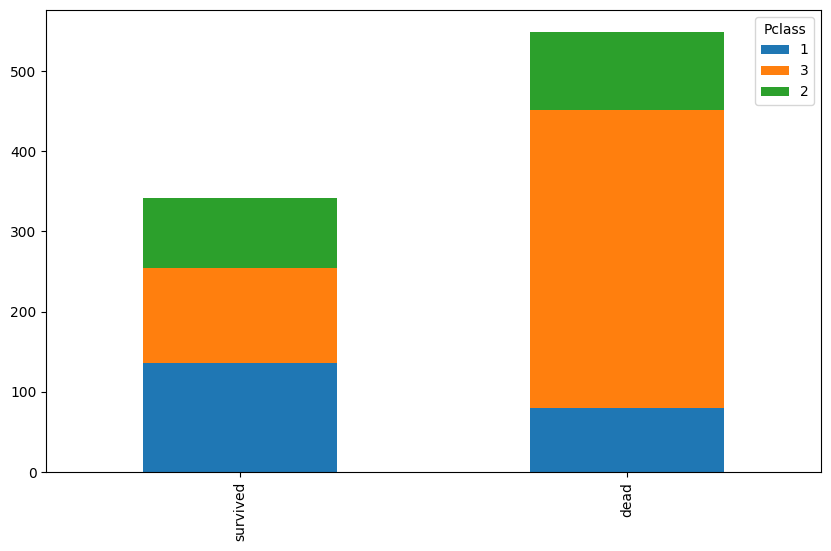

In [24]:
df.plot(kind='bar',stacked=True,figsize=(10,6))

In [25]:
# Function
def bar_chart(feature):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter : 
    feature : 컬럼들 => Pclass , Sex , SibSp , Parch , Embarked , Cabin
    '''
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True)

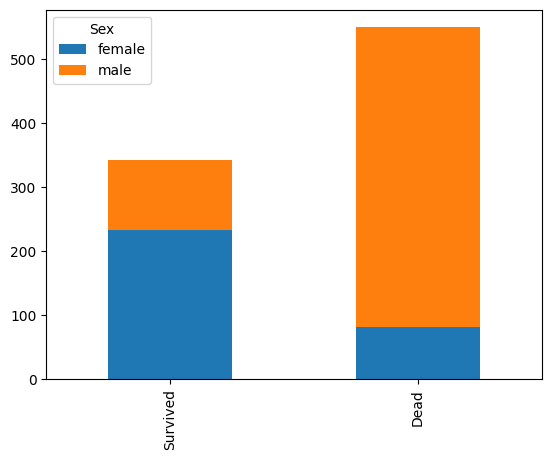

In [26]:
bar_chart('Sex')

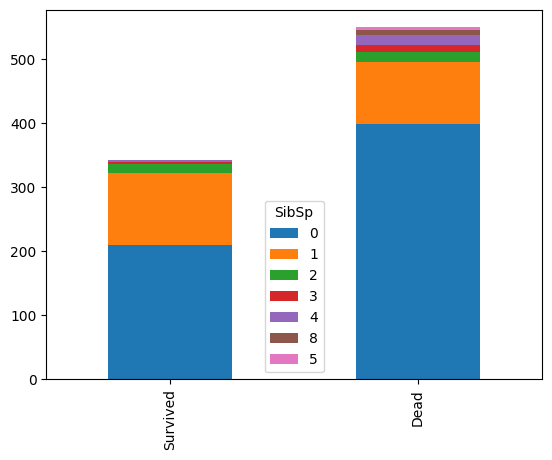

In [27]:
bar_chart('SibSp')

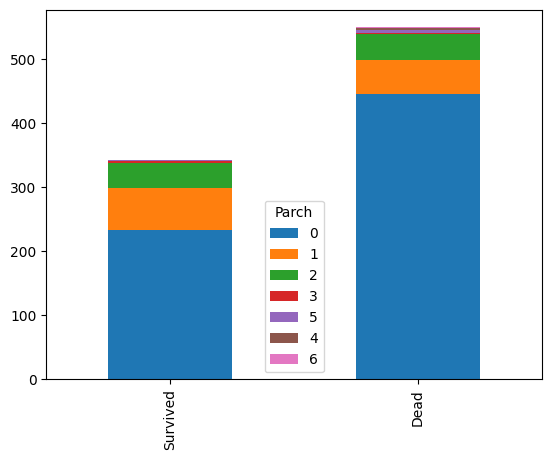

In [28]:
bar_chart('Parch')

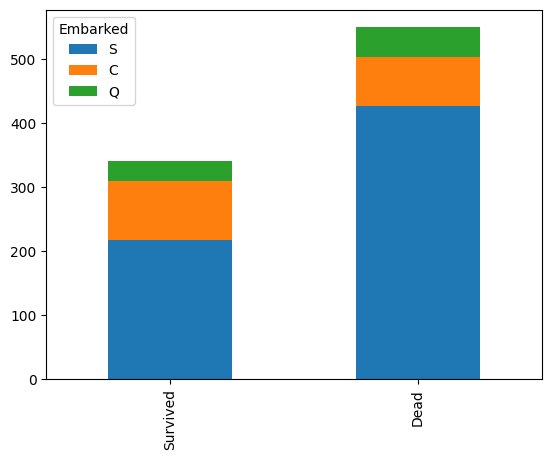

In [29]:
bar_chart('Embarked')

In [30]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

*** 
#### 4. 데이터 정제, 전처리 : 특정 처리
***

In [31]:
# 4-1. Titanic 침몰 상태 ? 
Image(url='https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

##### ※ 데이터 전처리 주의 사항 : train data, test data 동시에 전처리 해야한다. 

In [32]:
# Name : 이름 Mr, Miss, Mrs 추출
# 정규식
train['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
test['Title'] = test['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [33]:
# for문 
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [35]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [36]:
test['Title'].value_counts()

# Title : varible 
#   ↓  Mapping ( Mr=0, Miss=1, Mrs=3, 나머지=3 )
# Feature : 숫자로 되어있는 컬럼 (데이터 전처리에서 중요합 ! 숫자여야 연산가능하다)

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [37]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object', name='Title')

In [38]:
title_mapping={
    'Mr' : 0, 'Miss' : 1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Mlle':3, 'Major':3, 'Col':3,
    'Countess':3, 'Capt':3, 'Ms':3, 'Sir':3, 'Lady':3, 'Mme':3, 'Don':3, 'Jonkheer':3
}

train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [39]:
title_mapping={
    'Mr' : 0, 'Miss' : 1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Mlle':3, 'Major':3, 'Col':3,
       'Countess':3, 'Capt':3, 'Ms':3, 'Sir':3, 'Lady':3, 'Mme':3, 'Don':3, 'Jonkheer':3, 'Dona':3
}

test['Title'] = test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


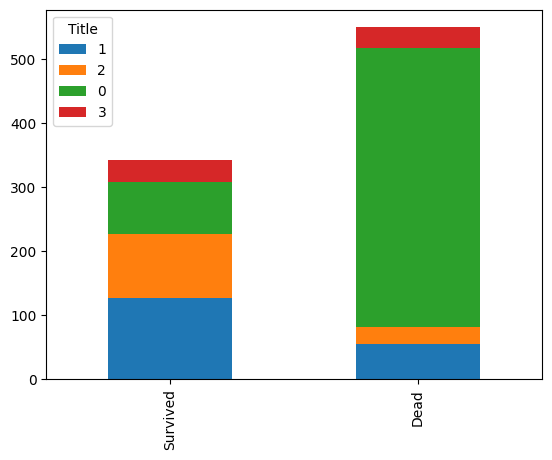

In [40]:
bar_chart('Title')

In [41]:
# 한쪽으로 쏠려있는 불균형 데이터 
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
# Name으로 Title 추출, Name 컬럼 del
# 머신러닝, 딥러닝에서는 숫자데이터로만 처리해야한다. 
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [44]:
# Sex => feature
# male :0 female : 1
sex_mapping = {'male' :0,'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)


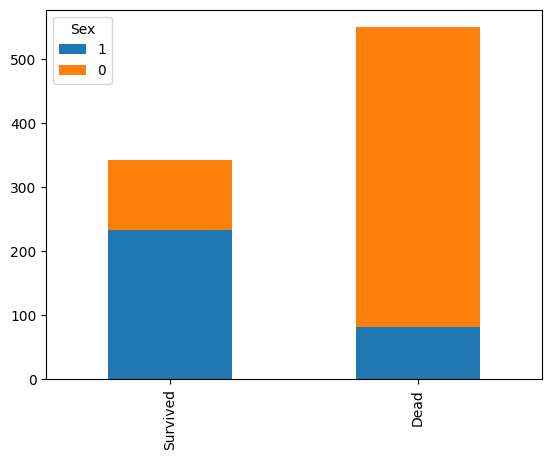

In [45]:
bar_chart('Sex')

In [46]:
# Age => Missing value => Title's(0,1,2,3) Age madian => fillna
# 0,1,2,3의 평균 나이
train['Age'].fillna(
      train.groupby('Title')['Age'].transform('median')       # title별 나이 가져오기
    , inplace= True     # inplace가 True일 경우 retern은 None / False일 경우 return은 Series로 보여준다. (저장안됨)
)   

In [47]:
test['Age'].fillna(
      test.groupby('Title')['Age'].transform('median')       # title별 나이 가져오기
    , inplace=True     # inplace가 True일 경우 retern은 None / False일 경우 return은 Series로 보여준다. (저장안됨)
)   

In [48]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [49]:
# nan값 확인 10개 행, 모든 컬럼
train.iloc[:10,:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [50]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

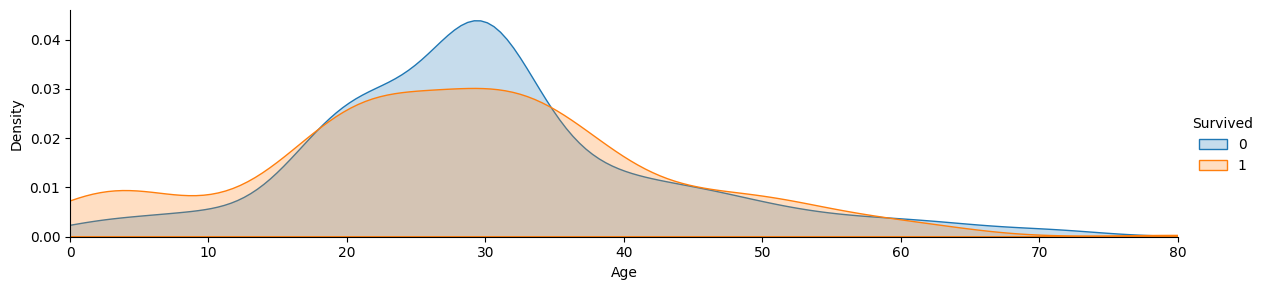

In [51]:
# 나이에 대한 시각화 
facet = sns.FacetGrid(train, hue='Survived', aspect=4)        # object만 생성       # aspect : 넓게
facet.map(sns.kdeplot, 'Age', fill=True)            # 데이터와 차드 연동
facet.set(xlim=(0, train['Age'].max()))             # x축 범위 지정 : 0세~ 최대나이
facet.add_legend()                                  # 범례표시
plt.show()

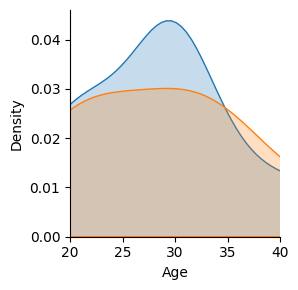

In [52]:
# 20세~ 40세 나이에 대한 시각화 
facet = sns.FacetGrid(train, hue='Survived')        # object만 생성
facet.map(sns.kdeplot, 'Age', fill=True)            # 데이터와 차드 연동
facet.set(xlim=(20, 40))
plt.show()

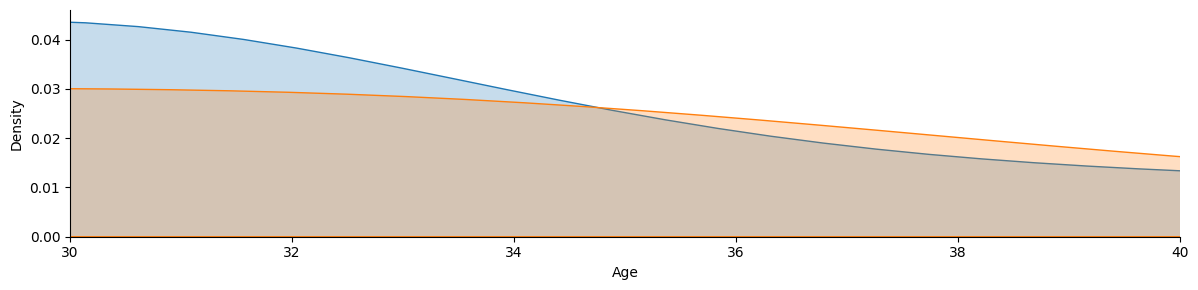

In [53]:
# 30~40세 
facet = sns.FacetGrid(train, hue='Survived',aspect=4)        # object만 생성
facet.map(sns.kdeplot, 'Age', fill=True)            # 데이터와 차드 연동
facet.set(xlim=(0, train['Age'].max()))
plt.xlim(30,40)
plt.show()

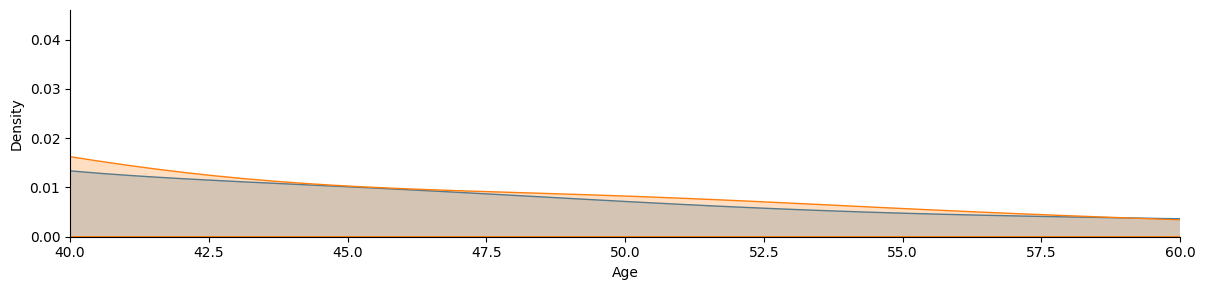

In [54]:
# 40~60세
facet = sns.FacetGrid(train, hue='Survived', aspect=4)        # object만 생성
facet.map(sns.kdeplot, 'Age', fill=True)            # 데이터와 차드 연동
facet.set(xlim=(0, train['Age'].max()))
plt.xlim(40,60)
plt.show()

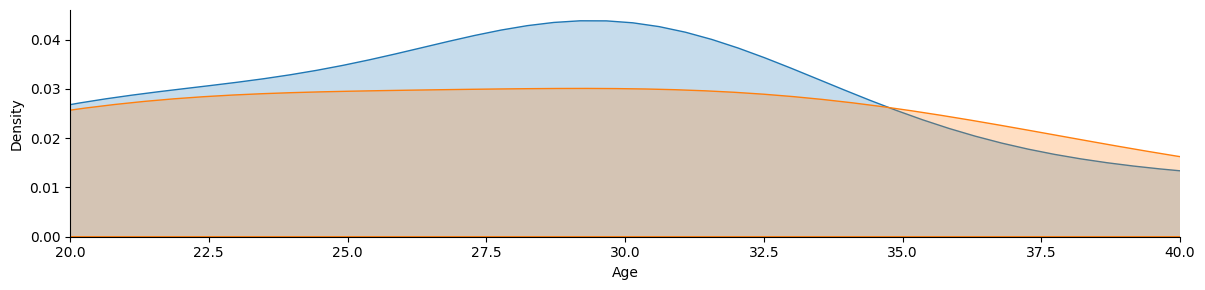

In [55]:
# 20~35세
facet = sns.FacetGrid(train, hue='Survived', aspect=4)        # object만 생성
facet.map(sns.kdeplot, 'Age', fill=True)            # 데이터와 차드 연동
facet.set(xlim=(0, train['Age'].max()))
plt.xlim(20,40)
plt.show()

In [56]:
train[train['Age']<=16]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2
10,11,1,3,1,4.0,1,1,PP 9549,16.7000,G6,S,1
14,15,0,3,1,14.0,0,0,350406,7.8542,NaN,S,1
16,17,0,3,0,2.0,4,1,382652,29.1250,NaN,Q,3
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,0,4.0,4,2,347082,31.2750,NaN,S,3
852,853,0,3,1,9.0,1,1,2678,15.2458,NaN,C,1
853,854,1,1,1,16.0,0,1,PC 17592,39.4000,D28,S,1
869,870,1,3,0,4.0,1,1,347742,11.1333,NaN,S,3


In [57]:
# 4-2. Binning : Age ===> Categorical
# feature vector map :
# child     (0< <=16세) = 0
# young     (16<  <= 26세) = 1
# adult     (16< <= 36세) = 2
# mid-age   (36< <=62) = 3
# senior    (62< ) = 4 

# train[train['Age']<=16] = 0 ===> 브로드캐스팅이 되서 모두 0값으로 바뀌므로 절대 이렇게 하면 안됨!!!! 
# ★★★★★★★★★★★★★★★★★★★★ 원본을 반드시 copy해서 사용하기!!!!!!!!!!!!!!!!!!!!!!!!!! ★★★★★★★★★★★★★★★★★★★★ 

train_cp = train.copy()

train_cp.loc[train_cp['Age'] <= 16,'Age'] =0
train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26),'Age']=1
train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36),'Age']=2
train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62),'Age']=3
train_cp.loc[(train_cp['Age'] > 62),'Age']=4

train_cp['Age'].value_counts()

Age
2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: count, dtype: int64

In [58]:
# train['Age']과 train_cp['Age'] 비교
train.head(1), train_cp.head(1)


(   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Ticket  Fare   
 0            1         0       3    0  22.0      1      0  A/5 21171  7.25  \
 
   Cabin Embarked  Title  
 0   NaN        S      0  ,
    PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Ticket  Fare   
 0            1         0       3    0  1.0      1      0  A/5 21171  7.25  \
 
   Cabin Embarked  Title  
 0   NaN        S      0  )

In [59]:
 
train_test_data = [train, test]

for train_cp in train_test_data : 
    train_cp.loc[(train_cp['Age'] <= 16), 'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36), 'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62), 'Age'] = 3
    train_cp.loc[(train_cp['Age'] > 62), 'Age'] = 4

In [60]:
train['Age'].value_counts(), test['Age'].value_counts()

(Age
 2.0    336
 1.0    255
 3.0    180
 0.0    105
 4.0     15
 Name: count, dtype: int64,
 Age
 2.0    139
 1.0    134
 3.0     99
 0.0     39
 4.0      7
 Name: count, dtype: int64)

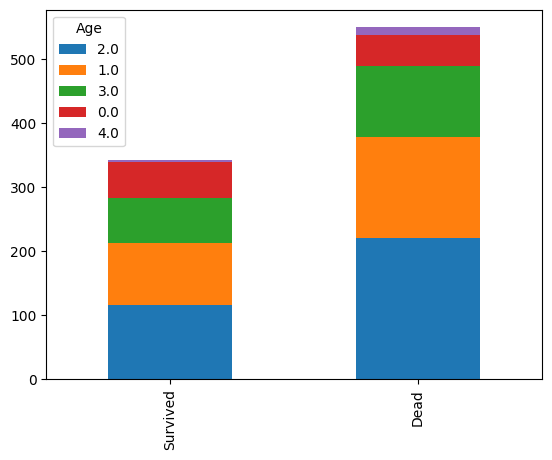

In [61]:
# 나이대별로 확률적으로 접근 가능
bar_chart('Age')

In [62]:
# Embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,1,3.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,1,3.0,0,0,113572,80.0,B28,NaN,2


In [63]:
# 1등칸에 탄 사람들의 선착장
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass1

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [64]:
# 2등칸에 탄 사람들의 선착장
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass2

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [65]:
# 3등칸에 탄 사람들의 선착장
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
Pclass3

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

Embarked,S,C,Q
1st class,127,85,2
2st class,164,17,3
3rd class,353,66,72


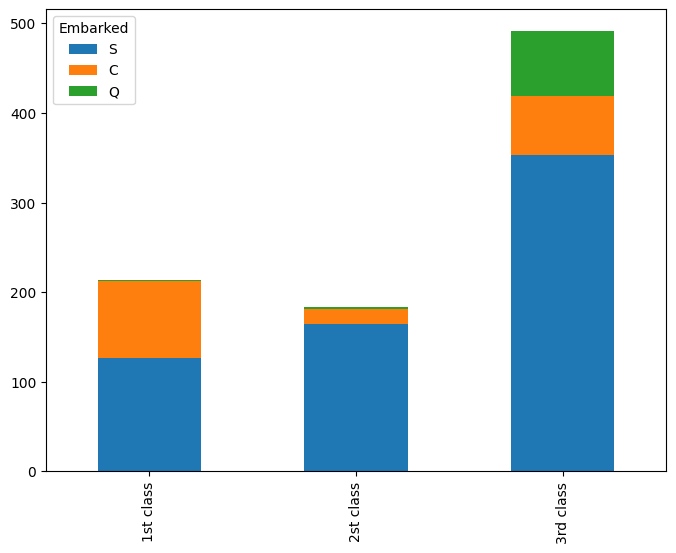

In [66]:
# DataFrame
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2st class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(8,6))
df

In [67]:
# Embarked의 nan값을 S 로 채우기 
for dataset in train_test_data : 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [68]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [69]:
# feature로 바꾸기 (숫자로 바꾸기)
# Emberked value : string => number
emberked_mapping = {'S':0,'C':1,'Q':2}
train['Embarked'] = train['Embarked'].map(emberked_mapping)
test['Embarked'] = test['Embarked'].map(emberked_mapping)

In [70]:
train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [72]:
# 4-6. Fare : 가격
train['Fare'].isnull().sum(), test['Fare'].isnull().sum()

# test data에 nan값이 하나 있다. 처리해야함 ===> 딥러닝은 nan에 상당히 예민하므로 nan처리를 해야함 

(0, 1)

In [73]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0


In [74]:
# test data에 있는 nan값을 평균값으로 채우기
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median')
    , inplace= True
)
test['Fare'].isnull().sum()

0

In [75]:
train[train['Pclass']==3]['Fare'].mean()

13.675550101832993

In [76]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int64
dtype: object

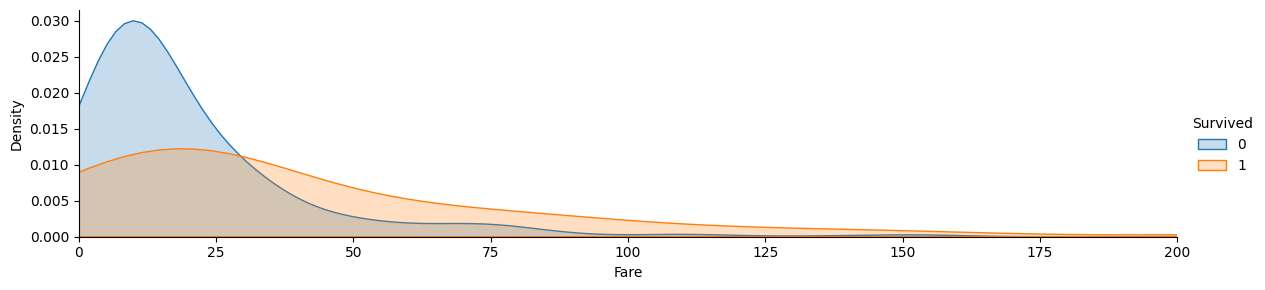

In [77]:
# Fare Categorical
facet = sns.FacetGrid(
      train  # DataFrame
    , hue='Survived'
    , aspect=4
)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,200)                 # 0~200불
plt.show()

In [78]:
train.loc[(train['Fare'] <=17) , 'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<=30)  , 'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<=100) , 'Fare'] = 2
train.loc[(train['Fare'] > 100), 'Fare'] = 3

test.loc[(test['Fare'] <=17) , 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<=30)  , 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<=100) , 'Fare'] = 2
test.loc[(test['Fare'] > 100), 'Fare'] = 3

train.head()
# cut() ===> 균일하게 자르는 코드 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [79]:
# 4-7 Cabin 처리
# train.Cabin.str[0]
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]
# train['Cabin'].value_counts()

In [80]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [81]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()

In [82]:
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()

In [83]:
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

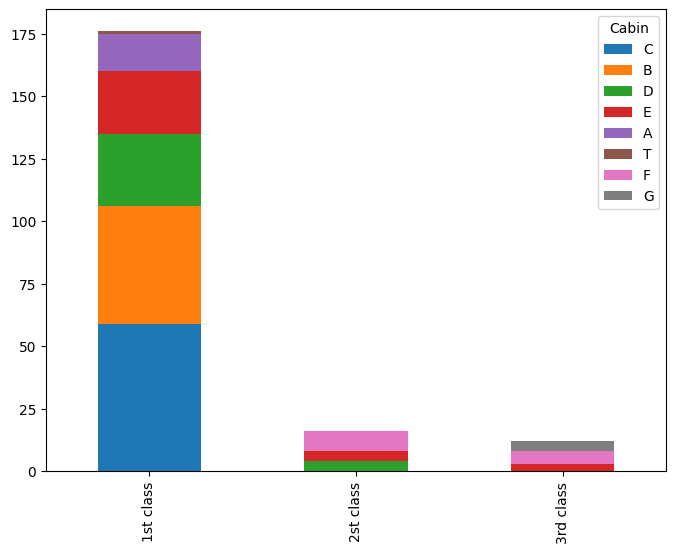

In [84]:
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class', '2st class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(8,6))
plt.show()

In [85]:
# 컬럼별 통계량
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.713805,0.972672,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.765432,0.971490,0.0,0.0,0.0,2.0,3.0
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0
Title,891.0,0.710438,0.968778,0.0,0.0,0.0,1.0,3.0


In [86]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8}

In [87]:
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [88]:
# fillna
train['Cabin'].fillna(
    train.groupby('Pclass')['Cabin'].transform('median')
    , inplace=True
)

test['Cabin'].fillna(
    test.groupby('Pclass')['Cabin'].transform('median')
    , inplace=True
)

train['Cabin'].value_counts()

Cabin
2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: count, dtype: int64

In [89]:
# 4-8. Faily size
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [90]:
train['Fsize'] = train['SibSp']+train['Parch'] +1
test['Fsize'] = test['SibSp']+test['Parch'] +1

In [91]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.713805,0.972672,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.765432,0.971490,0.0,0.0,0.0,2.0,3.0
Cabin,891.0,1.669585,0.540335,0.0,1.6,2.0,2.0,2.8
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0


In [92]:
train['Fsize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [93]:
f_mapping={1:0, 2:0.4 , 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4.0}
train['Fsize'] = train['Fsize'].map(f_mapping)
test['Fsize'] = test['Fsize'].map(f_mapping)

In [94]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.713805,0.972672,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.765432,0.971490,0.0,0.0,0.0,2.0,3.0
Cabin,891.0,1.669585,0.540335,0.0,1.6,2.0,2.0,2.8
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0


In [95]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Fsize'],
      dtype='object')

In [96]:
# 컬럼 한번에 삭제
drop_feature=['SibSp','Parch','Ticket']
train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Fsize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [99]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

***
### Modelling
***

In [100]:
# pip install scikit-learn

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [102]:
# 점수 확인 
k_fold = KFold(n_splits=10, shuffle= True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13)      # Model dbject
scoring = 'accuracy'    # 평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1,scoring=scoring)

print(score.mean())

0.5420099875156055


In [103]:
k_fold = KFold(n_splits=10, shuffle= True, random_state=42)
clf = DecisionTreeClassifier()
scoring = 'accuracy'    # 평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1,scoring=scoring)

print(score.mean())

0.7485518102372034


In [104]:
k_fold = KFold(n_splits=10, shuffle= True, random_state=42)
clf = RandomForestClassifier(n_estimators=13, max_depth=3)
scoring = 'accuracy'    # 평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1,scoring=scoring)

print(score.mean())

0.8204369538077403


---
### Testing
---

In [105]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(train_data,target)  # fit : 학습

prediction = clf.predict(test)       # 테스트 데이터로 예측값 추출
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [106]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived":prediction
    }
)
submission.to_csv('submission_rf_20200727.csv', index=False)